<a href="https://colab.research.google.com/github/URC-LCDN/estadistica/blob/main/EjemploDeDistNormal_AfluenciaMetrobus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

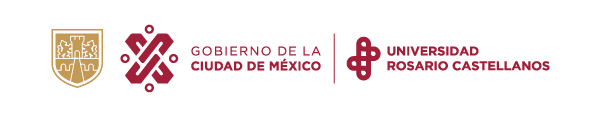

Actualizado: Julio de 2024

### Introducción

En este colab se busca utilizar una distribución de Normal para hacer un estimado del numero de usuarios del sistema metrobus donde podremos hace un cálculo de probabilidades y simulaciones donde deterinaremos la cantidad de unidades del Metrobús necesarias para suplir la demanda requerida.

Partimos de la afluencia diaria de Metrobús CDMX del mes de Mayo de 2024, obtenida del sistema de datos abiertos del gobierno de la CDMX.




### Obtener los datos

Utilizaremos el conjunto de **Afluencia diaria de Metrobús CDMX** del  sistema de Datos abiertos del Gobierno de la Ciudad de México (Sistema Ajolote).

Para más información acerca del conjunto de datos puede visitar:
https://datos.cdmx.gob.mx/dataset/afluencia-diaria-de-metrobus-cdmx


In [ ]:
import requests

def download_file(url, filename):
    # This method downloads a file from a URL containing a .txt, .csv, or .zip file,
    # for example, and saves it with the name of the filename variable.
    try:
      response = requests.get(url)
      if response.status_code == 200:
          with open(filename, 'wb') as file:
              file.write(response.content)
      print("Archivo descargado exitosamente.")
      return True
    except:
      print(f"No se pudo recuperar el archivo. Status code: {response.status_code}")
      return None


main_url = "https://datos.cdmx.gob.mx/dataset/f0ff3759-5c5d-41fb-80cc-2a3c8bbab278/resource/f7943c47-835d-4078-93ea-906f64b72f3b/download/afluenciamb_simple_05_2024.csv"
alternative_url = "https://gist.githubusercontent.com/mevangelista-alvarado/a5e68dbdab03723b63772d75d929769e/raw/82bf55daf57b24e734afe111a17979febaaba2df/afluenciamb_simple_05_2024.csv"
filename = "afluenciamb_simple_05_2024.csv"

if download_file(main_url, filename) is None:
    download_file(alternative_url, filename)

Archivo descargado exitosamente.


### Leemos el archivo

In [ ]:
import pandas as pd

df = pd.read_csv(filename)
df.head()

,fecha,anio,mes,linea,afluencia
0,2005-07-26,2005,Julio,Línea 1,3032667.0
1,2005-07-26,2005,Julio,Línea 5,NaN
2,2005-07-26,2005,Julio,Línea 2,NaN
3,2005-07-26,2005,Julio,Línea 3,NaN
4,2005-07-26,2005,Julio,Línea 6,NaN


Notamos la cantidad total

In [ ]:
df.shape

(48195, 5)

Exploramos las columnas del dataframe

In [ ]:
df.columns

Index(['fecha', 'anio', 'mes', 'linea', 'afluencia'], dtype='object')

### Tratamiento de datos

#### Filtro los datos para el mes de Mayo de 2024

In [ ]:
df_05_24 = df[(df['anio'] == 2024) & (df['mes'] == 'Mayo')]
df_05_24.head(7)

,fecha,anio,mes,linea,afluencia
47978,2024-05-01,2024,Mayo,Línea 1,245627.0
47979,2024-05-01,2024,Mayo,Línea 2,135960.0
47980,2024-05-01,2024,Mayo,Línea 3,121007.0
47981,2024-05-01,2024,Mayo,Línea 4,72624.0
47982,2024-05-01,2024,Mayo,Línea 5,174557.0
47983,2024-05-01,2024,Mayo,Línea 6,114049.0
47984,2024-05-01,2024,Mayo,Línea 7,91081.0


Notamos la cantidad total

In [ ]:
df_05_24.shape

(217, 5)

#### Filtramos por la Línea 1

In [ ]:
df_05_24_l1 = df_05_24[df_05_24['linea']== "Línea 1"]
df_05_24_l1.head()

,fecha,anio,mes,linea,afluencia
47978,2024-05-01,2024,Mayo,Línea 1,245627.0
47985,2024-05-02,2024,Mayo,Línea 1,486717.0
47992,2024-05-03,2024,Mayo,Línea 1,483295.0
47999,2024-05-04,2024,Mayo,Línea 1,329054.0
48006,2024-05-05,2024,Mayo,Línea 1,221653.0
48013,2024-05-06,2024,Mayo,Línea 1,456678.0
48020,2024-05-07,2024,Mayo,Línea 1,497636.0
48027,2024-05-08,2024,Mayo,Línea 1,496831.0
48034,2024-05-09,2024,Mayo,Línea 1,498108.0
48041,2024-05-10,2024,Mayo,Línea 1,375603.0


Notamos la cantidad total

In [ ]:
df_05_24_l1.shape

(31, 5)

**Ejercicio** Haga el filtrado anterior por la línea y el rango de fecha que más le interese.

### Conclusiones

Del dataframe anterior `df_05_24_l1` podemos obtener la cantidad de afluencia diaria de pasajeros de la línes 1 del metrobús de la CDMX durante el mes de Mayo de 2024.

In [ ]:
total = df_05_24_l1.afluencia.tolist()
total

[245627.0,
 486717.0,
 483295.0,
 329054.0,
 221653.0,
 456678.0,
 497636.0,
 496831.0,
 498108.0,
 375603.0,
 297688.0,
 205464.0,
 472907.0,
 513965.0,
 485837.0,
 506795.0,
 518825.0,
 386737.0,
 245282.0,
 412775.0,
 434020.0,
 505332.0,
 495591.0,
 509356.0,
 389015.0,
 233387.0,
 402990.0,
 440618.0,
 485157.0,
 497296.0,
 508119.0]

Con los datos obtenidos, procedemos a realizar un modelado a través de la distribución Normal.

Definimos X = \{Número de usuarios del sistema Metrobús por día \}.

Primero procedemos a calcular el valor medio de ocurrencia:

Cálculo la media con NumPy en Python

In [ ]:
import numpy as np

data = [245627, 486717, 483295, 329054, 221653, 456678, 497636, 496831, 498108, 375603, 297688, 205464, 472907, 513965, 485837, 506795, 518825, 386737, 245282, 412775, 434020, 505332, 495591, 509356, 389015, 233387, 402990, 440618, 485157, 497296, 508119]

# Calcula la media utilizando la función mean() de NumPy
mean = np.mean(data)

print("Media:", mean)

Media: 420592.1935483871


El valor nos dice que en promedio hay 420592 usuarios del transporte Metrobús por día para la línea 1.

Despúes procedemos a calcular la desviación estandár de los datos obtenidos:

Cálculo de la desviación estándar con NumPy en Python

In [ ]:
import numpy as np

# Datos de ejemplo
datos = [245627, 486717, 483295, 329054, 221653, 456678, 497636, 496831, 498108, 375603, 297688, 205464, 472907, 513965, 485837, 506795, 518825, 386737, 245282, 412775, 434020, 505332, 495591, 509356, 389015, 233387, 402990, 440618, 485157, 497296, 508119]

# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(datos)

print("Desviación Estándar:", desviacion_estandar)

Desviación Estándar: 99904.33007969284


Suponemos que podemos modelar X mediante la distribución normal, por lo que, X ∼ Normal($420592$ , $99904^2$)

Podemos hacer calculos de probabilidades para saber cuantos usuarios podría tener el sistema Metrobús en los próximos días.

  Por ejemplo: 1. ¿Cuál es la probabilidad de que se tenga una afluencia de más de 400,000 usuarios al sistema Metrobús el próximo día?


In [ ]:
from scipy.stats import norm

# Parámetros
mu = 420592  # media
sigma = 99904  # desviación estándar
x = 400000  # valor específico

# Calcular la probabilidad acumulada
probabilidad_mas_de_x = 1 - norm.cdf(x, mu, sigma)
print(f"La probabilidad de que la variable sea mayor que {x} es {probabilidad_mas_de_x:.4f}")

La probabilidad de que la variable sea mayor que 400000 es 0.5817


2. ¿Cuál es la probabilidad de que se tenga una afluencia de menos de 430,000 usuarios al sistema Metrobús el próximo día?

In [ ]:
from scipy.stats import norm

# Parámetros
mu = 420592  # media
sigma = 99904  # desviación estándar
x = 430000  # valor específico

# Calcular la probabilidad acumulada
probabilidad_acumulada = norm.cdf(x, mu, sigma)
print(f"La probabilidad de que la variable sea menor o igual a {x} es {probabilidad_acumulada:.4f}")

La probabilidad de que la variable sea menor o igual a 430000 es 0.5375


3. ¿Cuál es la probabilidad de que se tenga una afluencia de entre 390,000 y 500,000 usuarios al sistema Metrobús el próximo día?

In [ ]:
from scipy.stats import norm

# Parámetros
mu = 420592  # media
sigma = 99904  # desviación estándar
x1 = 390000  # valor específico
x2 = 500000  # límite superior

# Calcular la probabilidad
probabilidad_entre_x1_y_x2 = norm.cdf(x2, mu, sigma) - norm.cdf(x1, mu, sigma)
print(f"La probabilidad de que la variable esté entre {x1} y {x2} es {probabilidad_entre_x1_y_x2:.4f}")

La probabilidad de que la variable esté entre 390000 y 500000 es 0.4069


4. Podemos hace una gráfica de las probabilidades:

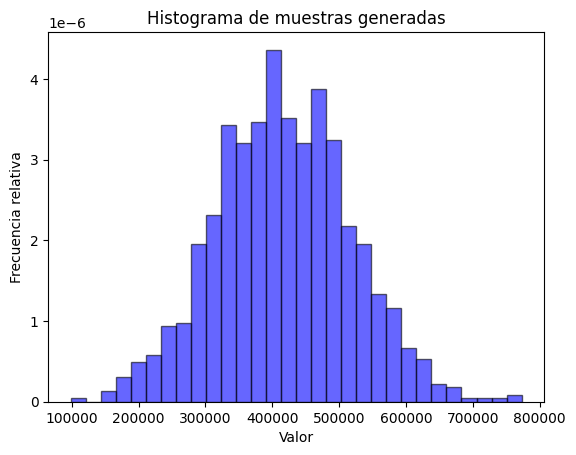

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
mu = 420592  # media
sigma = 99904  # desviación estándar
size = 1000  # número de muestras a generar

# Generar muestras
muestras = np.random.normal(mu, sigma, size)

# Crear el histograma
plt.hist(muestras, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de muestras generadas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia relativa')

# Mostrar el gráfico
plt.show()

5. Calculemos el percentiles del 95%

In [ ]:
from scipy.stats import norm

# Parámetros
mu = 420592  # media
sigma = 99904  # desviación estándar
percentil = 0.95  # percentil deseado

# Calcular el percentil
valor_percentil = norm.ppf(percentil, mu, sigma)
print(f"El percentil {percentil * 100}% de la distribución normal es {valor_percentil:.4f}")

El percentil 95.0% de la distribución normal es 584919.4567


Ahora buscaremos calcular el número de unidades necesarias para abastecer con un 95% de probabilidad la necesidad diaria de la línea 1.

Los datos proporcionados por el sistema de transporte de la CDMX nos indican que la capacidad máxima de una unidad de transporte Metrobus es de 160 usuarios por lo que supondremos una capacidad por viaje de 320 usuarios haciendo un promedio de 10 viajes por día por unidad. Por lo que cada unidad podría transportar una cantidad de 3200 usuarios al día.

Con lo cual necesitaremos una cantidad de:

In [ ]:
584919/3200

182.7871875

Por lo tanto necesitamos de al menos 183 unidades para abastecer con un 95% de probabilidad la necesidad diaria de la línea 1.

Nota: Para hacer reproducibles nuestros calculos finales, es necesario estimar el número de usuarios que viajan en promedio por unidad en cada viaje  así como el promedio de viajes diarios por unidad y usar ese estimado en el cálculo de las mismas.